## QUESTION 1 :
Q1. Explore the concept of bias variance trade off in:

1.	Decision Tree and
2.	Linear Regression

Take a dataset of your choice from UCI Machine Learning repository (for regression analysis) and estimate the bias error and variance error for the above mentioned modeling techniques. For decision tree, use different max_depth parameter values such as {3,5,7,9,11}. Choose a dataset which has at least 1000 rows. Draw a chart showing bias error and variance error based on your analysis.


## DATA SOURCE :


Combined Cycle Power Plant Data Set : The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.


https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.metrics import mean_squared_error

## Data Import and Pre-processing

In [2]:
dataset = pd.read_csv('Combined Cycle Power Plant.csv')
dataset.head()

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net hourly electrical energy output (EP)
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
Temperature (T)                             9568 non-null float64
Exhaust Vacuum (V)                          9568 non-null float64
Ambient Pressure (AP)                       9568 non-null float64
Relative Humidity (RH)                      9568 non-null float64
Net hourly electrical energy output (EP)    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
dataset.columns

Index(['Temperature (T)', 'Exhaust Vacuum (V)', 'Ambient Pressure (AP)',
       'Relative Humidity (RH)', 'Net hourly electrical energy output (EP)'],
      dtype='object')

In [5]:
dataset.shape

(9568, 5)

In [6]:
dataset.describe()

,Temperature (T),Exhaust Vacuum (V),Ambient Pressure (AP),Relative Humidity (RH),Net hourly electrical energy output (EP)
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
dataset.isnull().values.any()

False

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (9568, 4)
Shape of y: (9568,)


## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

## Multivariate Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)),1))

[[452.72 448.79]
 [437.47 431.44]
 [435.15 439.37]
 ...
 [443.26 450.54]
 [436.08 436.43]
 [467.9  458.76]]


In [12]:
import seaborn as sns

Text(0.5, 1.0, 'Multivariate Linear Regression Model')

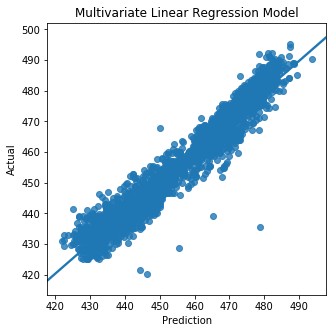

In [13]:
plt.figure(figsize=(5, 5))
sns.regplot(y_pred, y_test)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Multivariate Linear Regression Model')


In [14]:
print("Model Evaluation of Multivariate Linear Regression :\n")
#mse_ml=mean_squared_error(y_pred,y_test)
mse_ml=np.mean((y_test-y_pred)**2)
print("MSE for Multivariate Linear Regression model is:", mse_ml)

bias_ml=np.mean(np.mean(y_pred)-y_test)
print("Bias for Multivariate Linear Regression model is:", bias_ml)

var_ml=np.mean((y_pred - np.mean(y_pred))**2)
print("Variance for Multivariate Linear Regression model is:", var_ml)


Model Evaluation of Multivariate Linear Regression :

MSE for Multivariate Linear Regression model is: 22.067825310878526
Bias for Multivariate Linear Regression model is: -0.0808929277384464
Variance for Multivariate Linear Regression model is: 264.7422172273681


In [15]:
from sklearn.model_selection import cross_val_score

scores_lr = cross_val_score(regressor, X, y, cv=5)
print('Accuracy scores of each fold for Multivariate Linear Regression Model: ', [f'{acc:.3f}' for acc in scores_lr])
print(f'Accuracy: {scores_lr.mean():.3f} (+/- {scores_lr.std() * 2:.3f})')
print(f'Accuracy: {scores_lr.mean():.3f} (+/- {scores_lr.std():.3f})')


Accuracy scores of each fold for Multivariate Linear Regression Model:  ['0.930', '0.920', '0.931', '0.928', '0.934']
Accuracy: 0.928 (+/- 0.010)
Accuracy: 0.928 (+/- 0.005)


## Polynomial Linear Regression Model
 
 

In [16]:
from sklearn.preprocessing import PolynomialFeatures

i=0
degrees = np.arange(2,11)
bias_poly_array = np.zeros(9)
mse_poly_array = np.zeros(9)
var_poly_array = np.zeros(9)
rmse_poly_array = np.zeros(9)
min_rmse, min_deg = 1e10, 0

for power in degrees:    
    
    poly_reg = PolynomialFeatures(degree = power)
    X_poly = poly_reg.fit_transform(X_train)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y_train)
    
    y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform(X_test))
    
    mse_poly = mean_squared_error(y_test,y_pred_poly)
    rmse_poly = np.sqrt(mse_poly)
    var_poly= np.mean((y_pred_poly - np.mean(y_pred_poly))**2)
    bias_poly= np.mean(np.mean(y_pred_poly) - y_test)
    
    if min_rmse > rmse_poly:
        min_rmse = rmse_poly
        min_deg = power
    
    bias_poly_array[i] = bias_poly
    mse_poly_array[i] = mse_poly
    rmse_poly_array[i] = rmse_poly
    var_poly_array[i] = var_poly
    i+=1


In [17]:
print("Bias Variance Chart for Polynomial Linear Regression Model")

df_poly=pd.DataFrame({"Degree":degrees, "Bias":bias_poly_array, "Variance":var_poly_array, "MSE":mse_poly_array, "RMSE":rmse_poly_array})
df_poly.head(10)

Bias Variance Chart for Polynomial Linear Regression Model


,Degree,Bias,Variance,MSE,RMSE
0,2,-0.093701,265.275026,19.088834,4.369077
1,3,-0.078810,268.001072,18.292566,4.276981
2,4,-0.106770,267.505790,17.976995,4.239929
3,5,-0.107947,269.095335,17.922691,4.233520
4,6,-0.170741,276.857406,23.419648,4.839385
5,7,-0.117010,269.611268,18.028546,4.246004
6,8,-0.129011,269.088171,16.957473,4.117945
7,9,-0.128128,268.771620,16.967356,4.119145
8,10,-0.117661,268.910882,17.074904,4.132179


Best degree 8 with RMSE 4.1179452611719665


Text(0.5, 1.0, 'RMSE of Polynomial Linear Regression Model with each degree')

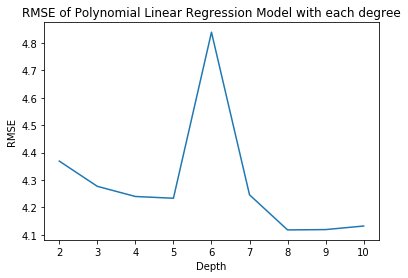

In [18]:
print('Best degree {} with RMSE {}'.format(min_deg, min_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, rmse_poly_array)
ax.set_xlabel('Depth')
ax.set_ylabel('RMSE')
ax.set_title('RMSE of Polynomial Linear Regression Model with each degree')


In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

var_poly_2darray = np.array(var_poly_array).reshape(-1,1)
var_poly_2darray = sc.fit_transform(var_poly_2darray)

bias_poly_2darray = np.array(bias_poly_array).reshape(-1,1)
#bias_poly_2darray = sc.fit_transform(bias_poly_2darray)

#mse_poly_2darray = np.array(mse_poly_array).reshape(-1,1)
#mse_poly_2darray = sc.fit_transform(mse_poly_2darray)


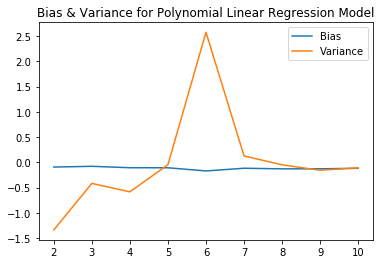

In [20]:
plt.plot(degrees, bias_poly_2darray, label='Bias')
plt.plot(degrees, var_poly_2darray, label='Variance')
#plt.plot(degrees, mse_poly_2darray, label='MSE')
plt.title('Bias & Variance for Polynomial Linear Regression Model')
plt.legend()
plt.legend()
plt.show()


## Decision Tree Regression Model

In [21]:
from sklearn.tree import DecisionTreeRegressor

i=0
depth = np.arange(3,12,2)
bias_dt_array = np.zeros(5)
mse_dt_array = np.zeros(5)
var_dt_array = np.zeros(5)
rmse_dt_array = np.zeros(5)
cv_scores = np.zeros(5)
min_rmse_dt, min_depth_dt = 1e10, 0

for dep in depth:
    
    DTregressor = DecisionTreeRegressor(max_depth=dep, random_state = 0)
    DTregressor.fit(X_train, y_train)
    
    y_pred_DT = DTregressor.predict(X_test)
    
    mse_dt = mean_squared_error(y_test,y_pred_DT)
    rmse_dt = np.sqrt(mse_dt)
    var_dt= np.mean((y_pred_DT - np.mean(y_pred_DT))**2)
    bias_dt= np.mean(np.mean(y_pred_DT) - y_test)
    
    if min_rmse_dt > rmse_dt:
        min_rmse_dt = rmse_dt
        min_depth_dt = dep
    
    
    bias_dt_array[i] = bias_dt
    mse_dt_array[i] = mse_dt
    rmse_dt_array[i] = rmse_dt
    var_dt_array[i] = var_dt
    
    scores_DT = cross_val_score(DTregressor, X, y, cv=5)
    cv_scores[i]=np.mean(scores_DT)
    i+=1
    

In [22]:

print("Bias Variance Chart for Decision Tree Regression Model")

df_dt=pd.DataFrame({"Depth":depth, "Bias":bias_dt_array, "Variance":var_dt_array, "MSE":mse_dt_array, "RMSE":rmse_dt_array, "Accuracy": cv_scores})
df_dt.head(10)


Bias Variance Chart for Decision Tree Regression Model


,Depth,Bias,Variance,MSE,RMSE,Accuracy
0,3,-0.111172,259.056784,29.058321,5.390577,0.907823
1,5,-0.099113,265.331873,21.023403,4.585129,0.930788
2,7,-0.117673,267.232221,18.861164,4.342944,0.939346
3,9,-0.133622,269.191253,20.055181,4.478301,0.941463
4,11,-0.129130,273.831794,20.730208,4.553044,0.937198


Best depth 7 with RMSE 4.3429441946644545


Text(0.5, 1.0, 'RMSE of Decission Tree Regression Model with each depth')

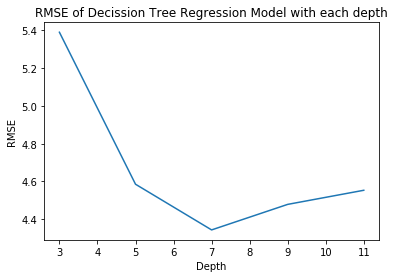

In [23]:
print('Best depth {} with RMSE {}'.format(min_depth_dt, min_rmse_dt))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(depth, rmse_dt_array)
ax.set_xlabel('Depth')
ax.set_ylabel('RMSE')
ax.set_title('RMSE of Decission Tree Regression Model with each depth')

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

var_dt_2darray = np.array(var_dt_array).reshape(-1,1)
var_dt_2darray = sc.fit_transform(var_dt_2darray)

#mse_dt_2darray = np.array(mse_dt_array).reshape(-1,1)
#mse_dt_2darray = sc.fit_transform(mse_dt_2darray)

bias_dt_2darray = np.array(bias_dt_array).reshape(-1,1)
bias_dt_2darray = sc.fit_transform(bias_dt_2darray)

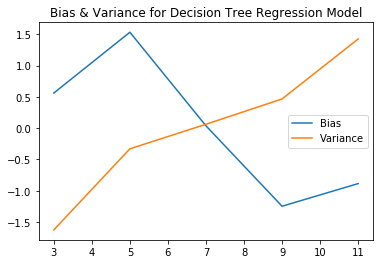

In [25]:
plt.plot(depth, bias_dt_2darray, label='Bias')
plt.plot(depth, var_dt_2darray, label='Variance')
#plt.plot(depth, mse_dt_2darray, label='MSE')
plt.title('Bias & Variance for Decision Tree Regression Model')
plt.legend()
plt.show()